<a href="https://colab.research.google.com/github/srikanthp147/Heart-Failure-Detection/blob/main/SPP_Resume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Data Extraction

In [2]:
code=input("Enter the stock code:")
df=yf.download(code,"2000-01-01","2025-01-01")

Enter the stock code:SI=F
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Data Preprocessing

In [3]:
df

Price,Close,High,Low,Open,Volume
Ticker,SI=F,SI=F,SI=F,SI=F,SI=F
Date,,,,,
2000-08-30,4.930000,4.950000,4.895000,4.950000,2319
2000-08-31,5.003000,5.045000,4.920000,4.920000,1612
2000-09-01,5.004000,5.035000,4.985000,5.035000,1375
2000-09-05,4.998000,5.005000,4.975000,4.990000,856
2000-09-06,4.983000,5.000000,4.980000,5.000000,232
...,...,...,...,...,...
2024-12-24,29.974001,29.974001,29.974001,29.974001,66
2024-12-26,30.047001,30.115000,29.980000,30.014999,109


In [4]:
df.tail(100)

Price,Close,High,Low,Open,Volume
Ticker,SI=F,SI=F,SI=F,SI=F,SI=F
Date,,,,,
2024-08-09,27.487000,27.487000,27.487000,27.487000,2
2024-08-12,27.917000,27.924999,27.780001,27.840000,11
2024-08-13,27.695000,27.695000,27.695000,27.695000,4
2024-08-14,27.254000,27.254000,27.254000,27.254000,30
2024-08-15,28.341999,28.341999,28.145000,28.145000,41
...,...,...,...,...,...
2024-12-24,29.974001,29.974001,29.974001,29.974001,66
2024-12-26,30.047001,30.115000,29.980000,30.014999,109


In [5]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,SI=F,SI=F,SI=F,SI=F,SI=F
count,6108.000000,6108.000000,6108.000000,6108.000000,6108.000000
mean,17.046670,17.168606,16.926447,17.053691,1460.805174
std,8.499672,8.596330,8.406276,8.506645,8523.296359
min,4.026000,4.026000,4.026000,4.026000,0.000000
25%,11.478750,11.616000,11.356500,11.544500,5.000000
50%,16.749000,16.833500,16.661000,16.742500,34.000000
75%,22.685250,22.868500,22.551250,22.680000,135.000000
max,48.584000,49.520000,47.540001,48.459999,170297.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6108 entries, 2000-08-30 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, SI=F)   6108 non-null   float64
 1   (High, SI=F)    6108 non-null   float64
 2   (Low, SI=F)     6108 non-null   float64
 3   (Open, SI=F)    6108 non-null   float64
 4   (Volume, SI=F)  6108 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 286.3 KB


In [7]:
df.isnull().sum()

,,0
Price,Ticker,
Close,SI=F,0
High,SI=F,0
Low,SI=F,0
Open,SI=F,0
Volume,SI=F,0


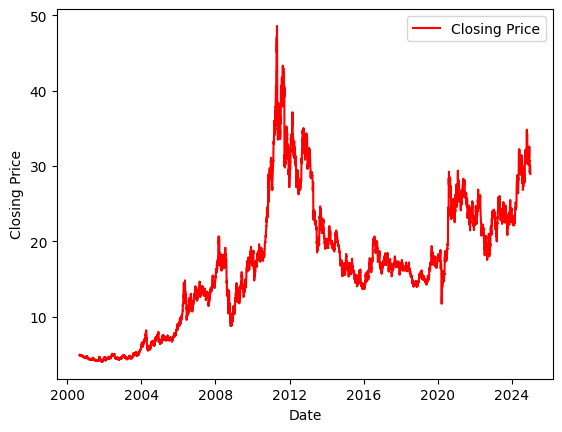

In [8]:
plt.plot(df["Close"],color='red',label="Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

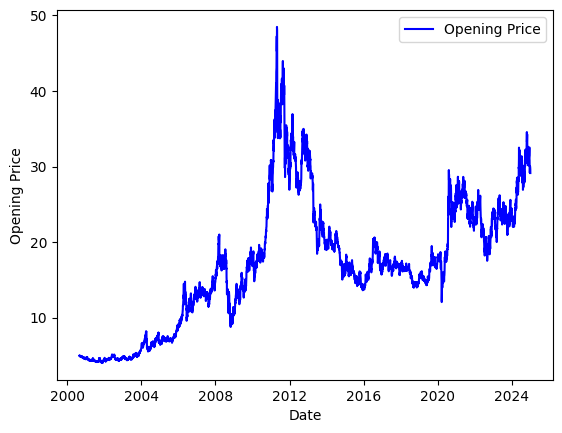

In [9]:
plt.plot(df["Open"],color='blue',label="Opening Price")
plt.xlabel("Date")
plt.ylabel("Opening Price")
plt.legend()
plt.show()

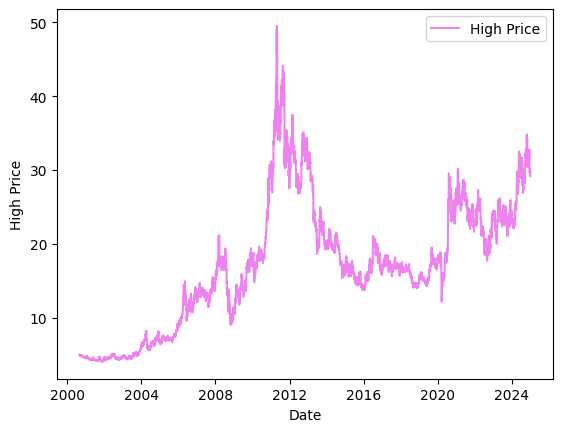

In [10]:
plt.plot(df["High"],color='violet',label="High Price")
plt.xlabel("Date")
plt.ylabel("High Price")
plt.legend()
plt.show()

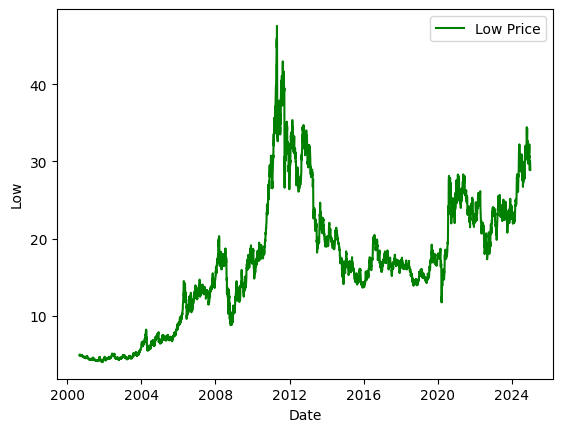

In [11]:
plt.plot(df["Low"],color='green',label="Low Price")
plt.xlabel("Date")
plt.ylabel("Low")
plt.legend()
plt.show()

# Feature Engineering

In [12]:
df["SMA_100"]=df["Close"].rolling(100).mean()

In [13]:
df["SMA_100"]

,SMA_100
Date,
2000-08-30,NaN
2000-08-31,NaN
2000-09-01,NaN
2000-09-05,NaN
2000-09-06,NaN
...,...
2024-12-24,30.63779
2024-12-26,30.66750
2024-12-27,30.69309


In [14]:
df=df.dropna().reset_index(drop=True)

# Model Building

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
def Performance_Metrics(y_test,y_predicted):
  mae=mean_absolute_error(y_test,y_predicted)
  mse=mean_squared_error(y_test,y_predicted)
  rmse=np.sqrt(mse)
  R2_score=r2_score(y_test,y_predicted)
  print("Mean Absolute Error:",mae)
  print("Mean Squared Error:",mse)
  print("Root Mean Square Error:",rmse)
  print("R2_Score:",R2_score)


**Linear Regression**

In [17]:
data_train=df["Close"].iloc[0:int(len(df)*0.7)]
data_test=df["Close"].iloc[int(len(df)*0.7):len(df)]
scaler=MinMaxScaler(feature_range=(0,1))
data_train=scaler.fit_transform(data_train)
data_test=scaler.transform(data_test)

In [18]:
x_train=[]
y_train=[]
for i in range(80,len(data_train)):
  x_train.append(data_train[i-80:i])
  y_train.append(data_train[i])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [19]:
x_train.shape

(4126, 80, 1)

In [20]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]))

In [21]:
y_train.shape

(4126, 1)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
Lr=LinearRegression()

In [24]:
Lr.fit(x_train,y_train)

LinearRegression()

In [25]:
x_test=[]
y_test=[]
for i in range(80,len(data_test)):
  x_test.append(data_test[i-80:i])
  y_test.append(data_test[i])
x_test=np.array(x_test)
y_test=np.array(y_test)

In [26]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1])

In [27]:
y_predict=Lr.predict(x_test)

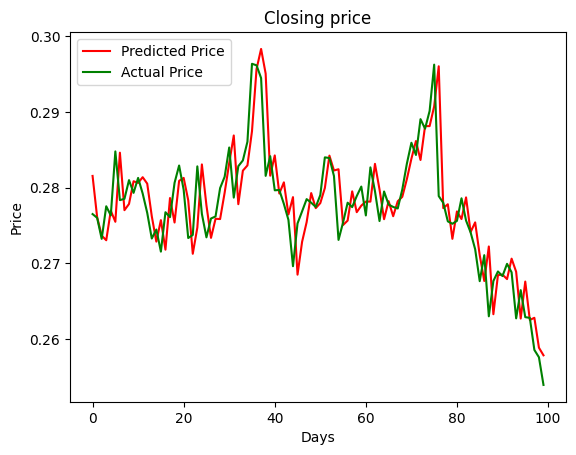

In [28]:
plt.plot(y_predict[0:100],color='red',label="Predicted Price")
plt.plot(y_test[0:100],color='green',label="Actual Price")
plt.title("Closing price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [29]:
y_test

array([[0.27649358],
       [0.27599981],
       [0.27321695],
       ...,
       [0.57518293],
       [0.56286191],
       [0.55913642]])

In [30]:
y_predict

array([[0.28153513],
       [0.27609063],
       [0.27365001],
       ...,
       [0.57859922],
       [0.570591  ],
       [0.55538545]])

In [31]:
Performance_Metrics(y_test,y_predict)

Mean Absolute Error: 0.006927157715124826
Mean Squared Error: 0.0001073109935364142
Root Mean Square Error: 0.010359101965731112
R2_Score: 0.9911862464355385


 **Neural Networks**

In [32]:
features=["Close","High","Low","Open","Volume","SMA_100"]

In [33]:
data_training=df[features][0:int(len(df)*0.7)]
data_testing=df[features][int(len(df)*0.7):]

In [34]:
data_training

Price,Close,High,Low,Open,Volume,SMA_100
Ticker,SI=F,SI=F,SI=F,SI=F,SI=F,
0,4.768,4.768,4.768000,4.768000,0,4.75374
1,4.785,4.785,4.785000,4.785000,0,4.75229
2,4.805,4.805,4.805000,4.805000,0,4.75031
3,4.803,4.803,4.803000,4.803000,160,4.74830
4,4.796,4.796,4.796000,4.796000,4,4.74628
...,...,...,...,...,...,...
4201,17.024,17.024,16.870001,16.920000,16,16.84489
4202,16.907,16.945,16.889999,16.889999,57,16.83909
4203,16.868,16.868,16.868000,16.868000,28,16.83230


In [35]:
data_testing

Price,Close,High,Low,Open,Volume,SMA_100
Ticker,SI=F,SI=F,SI=F,SI=F,SI=F,
4206,16.802000,16.844999,16.715000,16.715000,123,16.80850
4207,16.645000,16.795000,16.645000,16.795000,297,16.80302
4208,17.132000,17.132000,16.990000,16.990000,29,16.80520
4209,17.094000,17.094000,17.059999,17.065001,18,16.80876
4210,16.794001,17.105000,16.790001,17.105000,10,16.80563
...,...,...,...,...,...,...
6004,29.974001,29.974001,29.974001,29.974001,66,30.63779
6005,30.047001,30.115000,29.980000,30.014999,109,30.66750
6006,29.655001,29.934999,29.605000,29.934999,502,30.69309


In [36]:
scaler=MinMaxScaler()
data_training=scaler.fit_transform(data_training)

In [37]:
data_training

array([[1.66524554e-02, 1.63098452e-02, 1.70519853e-02, 1.66989269e-02,
        0.00000000e+00, 1.45091680e-02],
       [1.70339744e-02, 1.66835147e-02, 1.74426577e-02, 1.70815106e-02,
        0.00000000e+00, 1.44671461e-02],
       [1.74828272e-02, 1.71231327e-02, 1.79022795e-02, 1.75316159e-02,
        0.00000000e+00, 1.44097644e-02],
       ...,
       [2.88208630e-01, 2.82278979e-01, 2.95123403e-01, 2.89012924e-01,
        1.64418633e-04, 3.64553813e-01],
       [2.85874591e-01, 2.79992962e-01, 2.92733365e-01, 2.86672372e-01,
        3.75814019e-04, 3.64289219e-01],
       [2.84483140e-01, 2.78630138e-01, 2.91308530e-01, 2.85277038e-01,
        9.27790859e-04, 3.64032740e-01]])

In [38]:
data_training.shape

(4206, 6)

In [39]:
x_train=[]
y_train=[]
for i in range(100,data_training.shape[0]):
  x_train.append(data_training[i-100:i,0:6])
  y_train.append(data_training[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [40]:
x_train.shape

(4106, 100, 6)

In [41]:
y_train.shape

(4106,)

In [42]:
from keras.layers import Dense,Dropout,LSTM

In [43]:
model=keras.Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=60))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60)             │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,101 (148.83 KB)

 Trainable params: 38,101 (148.83 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam',loss="mean_squared_error")

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(
    monitor='loss',     # monitor loss
    patience=25,             # stop after 5 epochs with no improvement
    restore_best_weights=True  # load best weights when stopped
)


In [48]:
model.fit(x_train,y_train,epochs=50,batch_size=32,shuffle=False,validation_split=0.2,callbacks=[early_stop])

Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - loss: 7.2023e-04 - val_loss: 4.1568e-04
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - loss: 0.0027 - val_loss: 9.7144e-04
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 0.0017 - val_loss: 3.4497e-04
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - loss: 0.0026 - val_loss: 3.3502e-04
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - loss: 0.0016 - val_loss: 2.7966e-04
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - loss: 0.0015 - val_loss: 2.8608e-04
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 0.0016 - val_loss: 2.9361e-04
Epoch 10/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0024 - val_loss: 4.1874e-04
Epoch 11/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 0.0023 - val_loss: 

In [64]:
data_testing=scaler.transform(data_testing)

In [65]:
data_testing.shape

(1803, 6)

In [66]:
x_test=[]
y_test=[]
for i in range(100,data_testing.shape[0]):
  x_test.append(data_testing[i-100:i,0:6])
  y_test.append(data_testing[i,0])
x_test=np.array(x_test)
y_test=np.array(y_test)

In [67]:
y_test.shape

(1703,)

In [68]:
x_test.shape

(1703, 100, 6)

In [69]:
y_predict=model.predict(x_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [70]:
y_predict

array([[0.04194252],
       [0.04195081],
       [0.041953  ],
       ...,
       [0.04682019],
       [0.04678036],
       [0.04673395]], dtype=float32)

In [71]:
y_predict.shape

(1703, 1)

In [72]:
y_predicted_full=np.zeros((y_predict.shape[0],6))
y_predicted_full[:,0]=y_predict.reshape(-1)
y_predict=scaler.inverse_transform(y_predicted_full)

y_test_full=np.zeros((y_test.shape[0],6))
y_test_full[:,0]=y_test.reshape(-1)
y_test=scaler.inverse_transform(y_test_full)


In [73]:
y_predict.shape

(1703, 6)

In [74]:
y_predict=y_predict[:,0]
y_test=y_test[:,0]

In [75]:
y_predict

array([5.89487473, 5.89524406, 5.89534167, ..., 6.11221386, 6.11043908,
       6.10837132])

In [76]:
y_test

array([0.27970287, 0.27332914, 0.2737331 , ..., 0.57518293, 0.56286191,
       0.55913642])

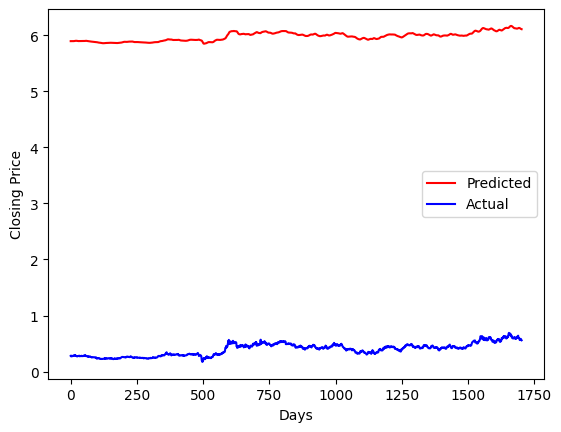

In [77]:
plt.plot(y_predict,color='red',label="Predicted")
plt.plot(y_test,color='blue',label="Actual")
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

In [78]:
Performance_Metrics(y_test,y_predict)

Mean Absolute Error: 5.58073116707912
Mean Squared Error: 31.14594574129247
Root Mean Square Error: 5.580855287614298
R2_Score: -2562.1890875812287
